In [1]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [7]:
data = pd.read_csv('Temperature.csv')

In [8]:
data


Source        Date Temperature Humidity
0        GCAG   12/6/2016         hot     high
1     GISTEMP   12/6/2016         hot     high
2        GCAG   11/6/2016         hot     high
3     GISTEMP   11/6/2016        mild     high
4        GCAG   10/6/2016        cool   normal
...       ...         ...         ...      ...
3283  GISTEMP  1880-03-06        mild   normal
3284     GCAG  1880-02-06        mild   normal
3285  GISTEMP  1880-02-06        mild     high
3286     GCAG  1880-01-06         hot   normal
3287  GISTEMP  1880-01-06        mild   normal

[3288 rows x 4 columns]

In [11]:
dummies_data = data.iloc[:, 0:3].values
dummies_data


array([['GCAG', '12/6/2016', 'hot'],
       ['GISTEMP', '12/6/2016', 'hot'],
       ['GCAG', '11/6/2016', 'hot'],
       ...,
       ['GISTEMP', '1880-02-06', 'mild'],
       ['GCAG', '1880-01-06', 'hot'],
       ['GISTEMP', '1880-01-06', 'mild']], dtype=object)

In [12]:
ground_data = data[['Source', 'Date','Temperature','Humidity']]
ground_data

Source        Date Temperature Humidity
0        GCAG   12/6/2016         hot     high
1     GISTEMP   12/6/2016         hot     high
2        GCAG   11/6/2016         hot     high
3     GISTEMP   11/6/2016        mild     high
4        GCAG   10/6/2016        cool   normal
...       ...         ...         ...      ...
3283  GISTEMP  1880-03-06        mild   normal
3284     GCAG  1880-02-06        mild   normal
3285  GISTEMP  1880-02-06        mild     high
3286     GCAG  1880-01-06         hot   normal
3287  GISTEMP  1880-01-06        mild   normal

[3288 rows x 4 columns]

In [13]:
one_hot_data = pd.get_dummies(ground_data)

one_hot_data = pd.get_dummies(ground_data)
one_hot_data

Source_GCAG  Source_GISTEMP  Date_1/6/1900  Date_1/6/1901  \
0               1               0              0              0   
1               0               1              0              0   
2               1               0              0              0   
3               0               1              0              0   
4               1               0              0              0   
...           ...             ...            ...            ...   
3283            0               1              0              0   
3284            1               0              0              0   
3285            0               1              0              0   
3286            1               0              0              0   
3287            0               1              0              0   

      Date_1/6/1902  Date_1/6/1903  Date_1/6/1904  Date_1/6/1905  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
3283              0              0              0              0   
3284              0              0              0              0   
3285              0              0              0              0   
3286              0              0              0              0   
3287              0              0              0              0   

      Date_1/6/1906  Date_1/6/1907  ...  Date_9/6/2012  Date_9/6/2013  \
0                 0              0  ...              0              0   
1                 0              0  ...              0              0   
2                 0              0  ...              0              0   
3                 0              0  ...              0              0   
4                 0              0  ...              0              0   
...             ...            ...  ...            ...            ...   
3283              0              0  ...              0              0   
3284              0              0  ...              0              0   
3285              0              0  ...              0              0   
3286              0              0  ...              0              0   
3287              0              0  ...              0              0   

      Date_9/6/2014  Date_9/6/2015  Date_9/6/2016  Temperature_cool  \
0                 0              0              0                 0   
1                 0              0              0                 0   
2                 0              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 1   
...             ...            ...            ...               ...   
3283              0              0              0                 0   
3284              0              0              0                 0   
3285              0              0              0                 0   
3286              0              0              0                 0   
3287              0              0              0                 0   

      Temperature_hot  Temperature_mild  Humidity_high  Humidity_normal  
0                   1                 0              1                0  
1                   1                 0              1                0  
2                   1                 0              1                0  
3                   0                 1              1                0  
4                   0                 0              0                1  
...               ...               ...            ...              ...  
3283                0                 1              0                1  
3284                0                 1              0        

In [16]:

from sklearn.datasets import load_iris
iris = load_iris()
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, ground_data['Temperature'])
clf_train = clf.fit(one_hot_data, ground_data['Humidity'])



In [17]:
!pip install graphviz

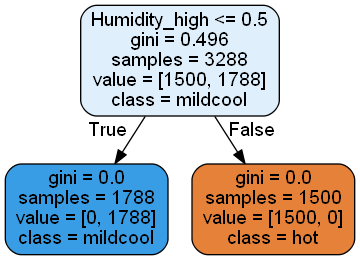

In [18]:
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values),
class_names=[ 'hot','mild''cool', 'high','normal'],
rounded=True, filled=True)



graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())